In [98]:
import sys
sys.path.append('../scripts')  # Appending the path to access the scripts folder
from functions3 import * 


## Reading the data


In [99]:

df=fetch_data('telecom', 'postgres', 'root' , 'localhost', 'xdr_data')
display(df.head())


c:\Users\Toshiba\Documents\Kifiya\week 2\notebooks\../scripts\functions3.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [100]:
print(df.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


### Handle missing values and aggregate per customer

In [101]:
agg_data = process_telecom_data(df)
display(agg_data.head())


c:\Users\Toshiba\Documents\Kifiya\week 2\notebooks\../scripts\functions3.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TCP DL Retrans. Vol (Bytes)'].fillna(df['TCP DL Retrans. Vol (Bytes)'].mean(), inplace=True)
c:\Users\Toshiba\Documents\Kifiya\week 2\notebooks\../scripts\functions3.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediat

,MSISDN/Number,Avg TCP DL Retransmission,Avg TCP UL Retransmission,Avg RTT DL (ms),Avg RTT UL (ms),Avg Throughput DL (kbps),Avg Throughput UL (kbps),Handset Type
0,3.360100e+10,2.080991e+07,759658.664811,46.000000,0.000000,37.0,39.0,Huawei P20 Lite Huawei Nova 3E
1,3.360100e+10,2.080991e+07,759658.664811,30.000000,1.000000,48.0,51.0,Apple iPhone 7 (A1778)
2,3.360100e+10,2.080991e+07,759658.664811,109.795706,17.662883,48.0,49.0,undefined
3,3.360101e+10,1.066000e+03,759658.664811,69.000000,15.000000,204.0,44.0,Apple iPhone 5S (A1457)
4,3.360101e+10,1.507977e+07,390430.332406,57.000000,2.500000,20197.5,8224.5,Apple iPhone Se (A1723)


### Compute & list top, bottom, and most frequent TCP, RTT, and Throughput values

In [102]:
tcp_results = analyze_tcp_retransmissions(agg_data)
    
display("Top 10 TCP DL Retransmissions:\n", tcp_results["top_tcp_dl"])
display("Bottom 10 TCP DL Retransmissions:\n", tcp_results["bottom_tcp_dl"])
display("Most Frequent TCP DL Retransmission:\n", tcp_results["most_frequent_tcp_dl"])
 
display("Top 10 TCP UL Retransmissions:\n", tcp_results["top_tcp_ul"])
display("Bottom 10 TCP UL Retransmissions:\n", tcp_results["bottom_tcp_ul"])
display("Most Frequent TCP UL Retransmission:\n", tcp_results["most_frequent_tcp_ul"])


'Top 10 TCP DL Retransmissions:\n'

,MSISDN/Number,Avg TCP DL Retransmission,Avg TCP UL Retransmission,Avg RTT DL (ms),Avg RTT UL (ms),Avg Throughput DL (kbps),Avg Throughput UL (kbps),Handset Type
85785,3.369858e+10,4.289488e+09,11989838.0,244.0,242.0,26456.0,5310.0,Huawei B528S-23A
32273,3.365871e+10,4.288060e+09,60496.0,62.0,19.0,80994.0,13188.0,Huawei B528S-23A
58026,3.366491e+10,4.268432e+09,215354.0,305.0,148.0,52901.0,2308.0,Huawei B528S-23A
31942,3.365863e+10,4.254644e+09,15816.0,61.0,27.0,87516.0,29617.0,Huawei B528S-23A
62049,3.366613e+10,4.211189e+09,68802.0,178.0,30.0,57104.0,2496.0,Huawei B528S-23A
70079,3.366877e+10,4.166591e+09,3989.0,149.0,23.0,70272.0,2000.0,Huawei B528S-23A
43629,3.366131e+10,4.131046e+09,6891979.0,35.0,46.0,94139.0,10864.0,Huawei B528S-23A
48341,3.366240e+10,4.117753e+09,51555.0,42.0,22.0,61286.0,6392.0,Huawei B528S-23A
64113,3.366682e+10,3.968072e+09,48174.0,93.0,64.0,35609.0,3710.0,Huawei B528S-23A
98211,3.376264e+10,3.785295e+09,1576179.0,50.0,18.0,45244.0,15043.0,Huawei B528S-23A


'Bottom 10 TCP DL Retransmissions:\n'

,MSISDN/Number,Avg TCP DL Retransmission,Avg TCP UL Retransmission,Avg RTT DL (ms),Avg RTT UL (ms),Avg Throughput DL (kbps),Avg Throughput UL (kbps),Handset Type
56622,3.366454e+10,2.0,21557.000000,437.0,4.0,12.0,171.0,Zte Mf259
95322,3.376154e+10,2.0,759658.664811,28.0,4.0,12.0,191.0,Zte Mf259
71705,3.366931e+10,4.0,759658.664811,32.0,11.0,16.0,144.0,Zte Mf259
71778,3.366933e+10,4.0,5296.000000,35.0,2.0,13.0,238.0,Zte Mf259
87156,3.369900e+10,4.0,759658.664811,545.0,2.0,7.0,55.0,Zte Mf259
87348,3.369906e+10,4.0,759658.664811,37.0,8.0,16.0,143.0,Zte Mf259
95213,3.376151e+10,4.0,759658.664811,40.0,4.0,11.0,166.0,Zte Mf259
95331,3.376154e+10,4.0,1318.000000,63.0,1.0,6.0,60.0,Zte Mf259
95774,3.376162e+10,4.0,759658.664811,47.0,7.0,9.0,178.0,Zte Mf259
100616,3.376394e+10,4.0,95464.000000,28.0,18.0,11.0,175.0,Zte Mf259


'Most Frequent TCP DL Retransmission:\n'

0    2.080991e+07
Name: Avg TCP DL Retransmission, dtype: float64

'Top 10 TCP UL Retransmissions:\n'

,MSISDN/Number,Avg TCP DL Retransmission,Avg TCP UL Retransmission,Avg RTT DL (ms),Avg RTT UL (ms),Avg Throughput DL (kbps),Avg Throughput UL (kbps),Handset Type
100005,3.376359e+10,9.213923e+06,2.455600e+09,50.000000,24.000000,58997.00,6247.000000,Huawei B528S-23A
57181,3.366470e+10,3.233008e+08,1.751384e+09,312.000000,52.000000,63163.00,6778.000000,Huawei B528S-23A
58664,3.366509e+10,1.494257e+08,1.727810e+09,42.000000,39.000000,144177.00,37662.000000,Huawei B528S-23A
70913,3.366905e+10,6.609548e+06,1.292337e+09,48.750000,31.500000,25689.75,9820.750000,Huawei B528S-23A
45158,3.366168e+10,1.222240e+05,7.948258e+08,32.000000,9.000000,39624.00,13541.000000,Huawei B528S-23A
85123,3.369838e+10,2.825035e+08,7.195718e+08,125.000000,167.000000,42256.00,20965.000000,Huawei B528S-23A
69068,3.366845e+10,3.076798e+06,5.262463e+08,178.000000,495.000000,17917.00,12905.000000,Huawei B528S-23A
55835,3.366431e+10,2.880584e+07,4.590686e+08,261.000000,349.000000,75147.00,40658.000000,Huawei B528S-23A
38577,3.366009e+10,2.776754e+07,4.518769e+08,55.000000,7.000000,26599.00,31411.000000,Apple iPhone X (A1901)
30175,3.365825e+10,6.507573e+06,4.395504e+08,58.666667,25.166667,57994.50,4783.333333,Huawei B528S-23A


'Bottom 10 TCP UL Retransmissions:\n'

,MSISDN/Number,Avg TCP DL Retransmission,Avg TCP UL Retransmission,Avg RTT DL (ms),Avg RTT UL (ms),Avg Throughput DL (kbps),Avg Throughput UL (kbps),Handset Type
20111,3.364280e+10,1.036310e+05,1.0,127.0,125.0,39577.0,1393.0,Xiaomi Communica. Redmi Note6 Pro
67996,3.366809e+10,1.129270e+05,1.0,39.0,6.0,14731.0,700.0,Tp-Link Technolo. Tl-Mr6400
104817,3.378259e+10,7.505983e+06,1.0,57.0,12.0,73997.0,2532.0,Spa Condor Elect. Plume L2
18026,3.363527e+10,5.774870e+06,2.0,73.0,21.0,36513.0,820.0,Oneplus Technolo. Oneplus 5T
37272,3.365978e+10,1.735402e+09,2.0,79.0,27.0,28845.0,826.0,Huawei E5573
89069,3.369960e+10,2.427400e+04,2.0,43.0,9.0,17128.0,1870.0,Ecom Instruments. Ecom Mobile Safety Smart-Ex 201
2133,3.360775e+10,5.272000e+03,3.0,276.0,13.0,1220.0,270.0,Wiko Global Sasu Wiko Lenny2
4387,3.361166e+10,1.416880e+05,3.0,34.0,8.0,15579.0,454.0,Samsung Galaxy A8 (2018)
5954,3.361415e+10,8.846000e+03,3.0,93.0,8.0,1391.0,1410.0,Samsung Galaxy S8 (Sm-G950F)
14029,3.362713e+10,2.080991e+07,3.0,55.0,2.0,4444.0,401.0,Sony Mobile Comm. Xperia Xz


'Most Frequent TCP UL Retransmission:\n'

0    759658.664811
Name: Avg TCP UL Retransmission, dtype: float64

### Distribution of throughput and TCP retransmissions per handset type

In [103]:

throughput_per_handset = analyze_throughput_per_handset(agg_data)
display(throughput_per_handset.head())


,Handset Type,Avg Throughput DL (kbps),Avg Throughput UL (kbps)
0,A-Link Telecom I. Cubot A5,23184.0,326.0
1,A-Link Telecom I. Cubot Note Plus,6527.0,172.0
2,A-Link Telecom I. Cubot Note S,8515.0,422.0
3,A-Link Telecom I. Cubot Nova,55667.0,550.0
4,A-Link Telecom I. Cubot Power,69126.0,342.0


###  K-means clustering to segment users into experience groups

In [104]:
# Main execution

# Prepare the data for clustering
clustering_data = prepare_clustering_data(agg_data)

# Normalize the data
scaled_data = normalize_data(clustering_data)

# Apply K-means clustering
agg_data['Cluster'] = apply_kmeans(scaled_data, n_clusters=3)

# Analyze and display cluster analysis results
cluster_analysis = analyze_clusters(agg_data)
display(cluster_analysis)


,MSISDN/Number,Avg TCP DL Retransmission,Avg TCP UL Retransmission,Avg RTT DL (ms),Avg RTT UL (ms),Avg Throughput DL (kbps),Avg Throughput UL (kbps),Cluster
Cluster,,,,,,,,
0,4.513317e+10,1.673220e+07,6.663620e+05,117.986895,16.757944,11551.509526,1506.907729,0.0
1,3.368305e+10,2.163720e+09,1.884209e+06,104.262302,38.807738,62555.049603,8796.788492,1.0
2,3.369061e+10,1.221375e+08,1.806782e+09,113.187500,36.625000,73006.687500,15126.937500,2.0


### Description of each cluster (based on data)


Cluster 0 characteristics:
MSISDN/Number                4.513317e+10
Avg TCP DL Retransmission    1.673220e+07
Avg TCP UL Retransmission    6.663620e+05
Avg RTT DL (ms)              1.179869e+02
Avg RTT UL (ms)              1.675794e+01
Avg Throughput DL (kbps)     1.155151e+04
Avg Throughput UL (kbps)     1.506908e+03
Cluster                      0.000000e+00
dtype: float64

Cluster 1 characteristics:
MSISDN/Number                3.368305e+10
Avg TCP DL Retransmission    2.163720e+09
Avg TCP UL Retransmission    1.884209e+06
Avg RTT DL (ms)              1.042623e+02
Avg RTT UL (ms)              3.880774e+01
Avg Throughput DL (kbps)     6.255505e+04
Avg Throughput UL (kbps)     8.796788e+03
Cluster                      1.000000e+00
dtype: float64

Cluster 2 characteristics:
MSISDN/Number                3.369061e+10
Avg TCP DL Retransmission    1.221375e+08
Avg TCP UL Retransmission    1.806782e+09
Avg RTT DL (ms)              1.131875e+02
Avg RTT UL (ms)              3.662500e+01
Avg 

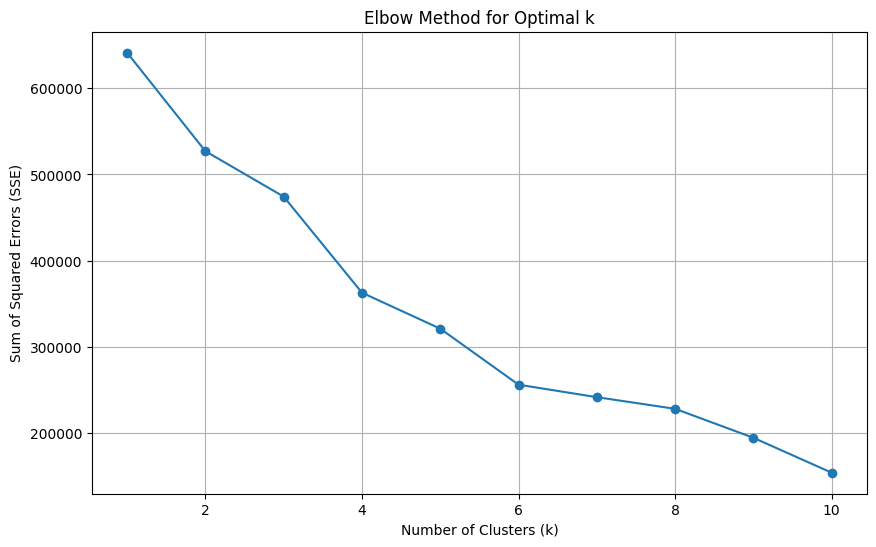

In [105]:
# Display characteristics for each cluster
display_cluster_characteristics(agg_data, num_clusters=3)

# Plot the elbow method
plot_elbow_method(scaled_data, max_clusters=10)
